## Data Analysis with Python and Pandas

### Creating and Navigating a Dataframe

In [1]:
import pandas as pd

In [2]:
starting = {
    'col_1':[5,2,4,7,2,4],
    'col_2':[7,8,2,1,8,9],
    'col_3':[10,4,2,1,9,10],
    'Name':['HG','TY','CS','YU','PO','XW'],
    'col_4':[5,6,7,1,5,6],
    'col_5':[9,9,2,1,3,9],
    'col_6':[7,8,2,1,1,0]
}

df = pd.DataFrame(starting)
df

,col_1,col_2,col_3,Name,col_4,col_5,col_6
0,5,7,10,HG,5,9,7
1,2,8,4,TY,6,9,8
2,4,2,2,CS,7,2,2
3,7,1,1,YU,1,1,1
4,2,8,9,PO,5,3,1
5,4,9,10,XW,6,9,0


In [3]:
df.dtypes

col_1     int64
col_2     int64
col_3     int64
Name     object
col_4     int64
col_5     int64
col_6     int64
dtype: object

In [4]:
df['col_1'][2]

4

In [5]:
df.head(2)

,col_1,col_2,col_3,Name,col_4,col_5,col_6
0,5,7,10,HG,5,9,7
1,2,8,4,TY,6,9,8


In [6]:
df.tail(2)

,col_1,col_2,col_3,Name,col_4,col_5,col_6
4,2,8,9,PO,5,3,1
5,4,9,10,XW,6,9,0


In [7]:
df.index

RangeIndex(start=0, stop=6, step=1)

In [8]:
df.index

RangeIndex(start=0, stop=6, step=1)

In [9]:
df

,col_1,col_2,col_3,Name,col_4,col_5,col_6
0,5,7,10,HG,5,9,7
1,2,8,4,TY,6,9,8
2,4,2,2,CS,7,2,2
3,7,1,1,YU,1,1,1
4,2,8,9,PO,5,3,1
5,4,9,10,XW,6,9,0


### Visualising Pandas Dataframe

In [10]:
import pandas as pd
import datetime
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

data = sns.load_dataset('car_crashes')
data.head()


Bad key "axes.color_cycle" on line 3 in
/Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/ourstyle.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


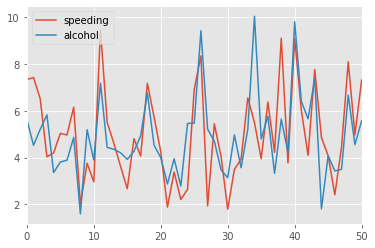

In [11]:
# data['speeding'].plot()
# data['alcohol'].plot()
data[['speeding','alcohol']].plot()
plt.legend()
plt.show()

In [12]:
data['speeding'].tolist()[-2]

4.968

In [13]:
data[['speeding','alcohol']].corr().iloc[1,0]

0.6697185644227317

### IO Operations - CSV

In [14]:
import pandas as pd
import datetime
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

data = sns.load_dataset('car_crashes')
data[['speeding','alcohol']].to_csv('speed_alcohol.csv')

In [15]:
data_sample = pd.read_csv('speed_alcohol.csv',index_col=0)
data_sample.head()

,speeding,alcohol
0,7.332,5.640
1,7.421,4.525
2,6.510,5.208
3,4.032,5.824
4,4.200,3.360


### IO Operations - HDF

### Data Manipulation

In [16]:
import pandas as pd
import datetime
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

data = sns.load_dataset('car_crashes')
# data['n'] = data['alcohol'] + data['speeding']
# data['not_distracted'] = data['not_distracted']/10


data['over_speeding'] = data['speeding'] > 6
data2 = data[data['speeding'] > 7.8]
data2.head()




,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,over_speeding
11,17.5,9.450,7.175,14.350,15.225,861.18,120.92,HI,True
26,21.4,8.346,9.416,17.976,18.190,816.21,85.15,MT,True
38,18.2,9.100,5.642,17.472,16.016,905.99,153.86,PA,True
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC,True
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV,True


### Statistical Analysis with Pandas

In [17]:
describe = data.describe()
describe['ins_premium']

count      51.000000
mean      886.957647
std       178.296285
min       641.960000
25%       768.430000
50%       858.970000
75%      1007.945000
max      1301.520000
Name: ins_premium, dtype: float64

In [18]:
data['5_AVG_Speed'] = data['speeding'].rolling(5).mean()
data['10__AVG_Speed'] = data['speeding'].rolling(10).mean()

In [19]:
data['5_STD_Speed'] = data['speeding'].rolling(5).std()
data['10_STD_Speed'] = data['speeding'].rolling(10).std()

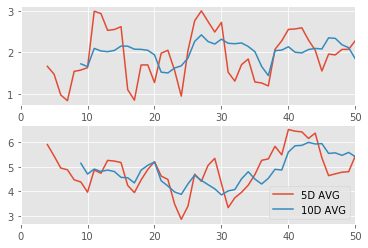

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=1)
data['5_AVG_Speed'].plot(ax=axes[1], label='5D AVG')
data['10__AVG_Speed'].plot(ax=axes[1], label='10D AVG')
data['5_STD_Speed'].plot(ax=axes[0], label='5D STD')
data['10_STD_Speed'].plot(ax=axes[0], label='10D STD')

plt.legend(loc=4)
plt.show()

In [21]:
from statistics import mean

def moving_average(data):
    return mean(data)


In [22]:
data['5D_AVG_Speed'] =  data['speeding'].rolling(5).apply(moving_average)

/Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


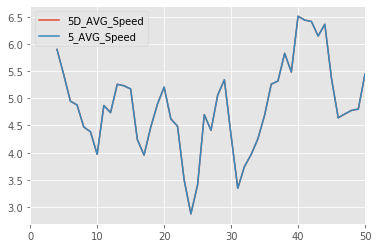

In [23]:
data[['5D_AVG_Speed', '5_AVG_Speed']].plot()

In [24]:
data[['5D_AVG_Speed', '5_AVG_Speed']].corr()

,5D_AVG_Speed,5_AVG_Speed
5D_AVG_Speed,1.0,1.0
5_AVG_Speed,1.0,1.0


In [25]:
data.dropna().head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,over_speeding,5_AVG_Speed,10__AVG_Speed,5_STD_Speed,10_STD_Speed,5D_AVG_Speed
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL,False,4.3842,5.1416,1.576900,1.725578,4.3842
10,15.6,2.964,3.900,14.820,14.508,913.15,142.80,GA,False,3.9706,4.7048,1.634660,1.661149,3.9706
11,17.5,9.450,7.175,14.350,15.225,861.18,120.92,HI,True,4.8670,4.9077,2.987466,2.096617,4.8670
12,15.3,5.508,4.437,13.005,14.994,641.96,82.75,ID,False,4.7374,4.8075,2.931091,2.034558,4.7374
13,12.8,4.608,4.352,12.032,12.288,803.11,139.15,IL,False,5.2578,4.8651,2.528206,2.018251,5.2578


In [26]:
# Fill forward - use past data for missing data
data.fillna(method='ffill')
# Fill backward - use future data for missing data
data.fillna(method='bfill')
# Fill with a specific value - use data as an outlier 
## Using limits
one_pct = int(len(data) * 0.05)
data.fillna(value = 9999, limit=one_pct).head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,over_speeding,5_AVG_Speed,10__AVG_Speed,5_STD_Speed,10_STD_Speed,5D_AVG_Speed
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,True,9999.000,9999.0,9999.000000,9999.0,9999.000
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,True,9999.000,9999.0,9999.000000,9999.0,9999.000
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,True,NaN,NaN,NaN,NaN,NaN
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,False,NaN,NaN,NaN,NaN,NaN
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,False,5.899,NaN,1.667002,NaN,5.899


In [27]:
one_pct = int(len(data) * 0.05)

In [28]:
one_pct

2

### Detecting Outliers - Example 1

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style 
%matplotlib inline 

style.use('ggplot')

bridge_reading = {'Distance_mm':[50012, 50015, 5024012, 50007, 50016, 50014]}
df = pd.DataFrame(bridge_reading)
# df.boxplot(column='Distance_mm')
# plt.show()
# stats = df.describe()
# print(stats)
# print(stats['Distance_mm']['std'])
df['std'] = df['Distance_mm'].rolling(2).std()
df = df[df['std'] < 50]
df

,Distance_mm,std
1,50015,2.121320
4,50016,6.363961
5,50014,1.414214


### Detecting Outliers - Example 2

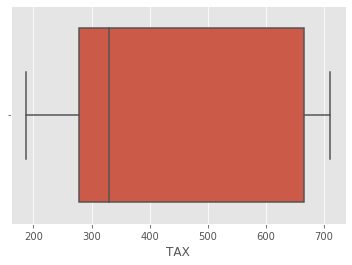

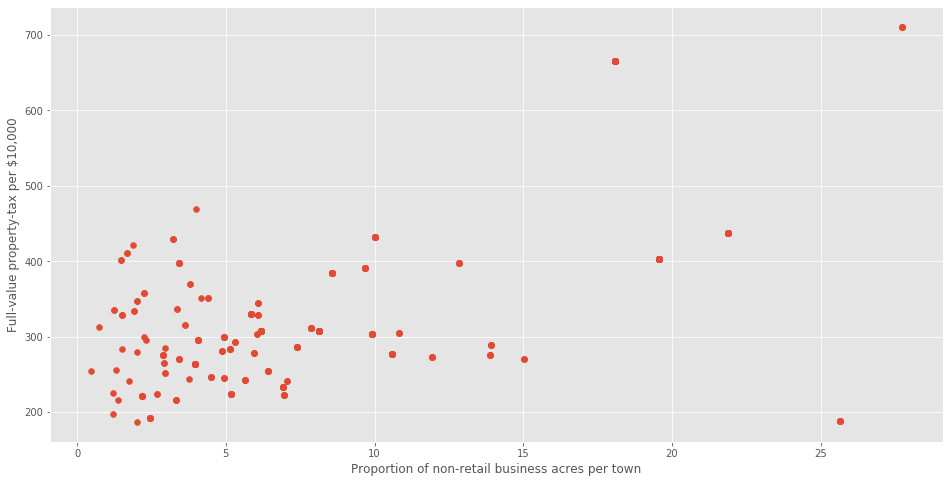

In [30]:
from sklearn.datasets import load_boston
import seaborn as sns

boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names

# Create the dataframe 
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns 
boston_df.head()

sns.boxplot(x=boston_df['TAX'])

fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax per $10,000')
plt.show()

In [31]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(boston_df))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


In [32]:
threshold = 3
print(np.where(z > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

In [33]:
z[102][11]

3.134425327914092

In [34]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [35]:
Q1 = boston_df.quantile(0.25)
Q3= boston_df.quantile(0.75)
IQR = Q3 -Q1
IQR

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64

In [36]:
print(boston_df[(boston_df < (Q1 - 1.5*IQR)) | (boston_df > (Q3 +1.5*IQR))])

        CRIM  ZN  INDUS  CHAS  NOX  RM  AGE  DIS  RAD  TAX  PTRATIO       B  \
0        NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN     NaN   
1        NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN     NaN   
2        NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN     NaN   
3        NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN     NaN   
4        NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN     NaN   
5        NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN     NaN   
6        NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN     NaN   
7        NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN     NaN   
8        NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN     NaN   
9        NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN     NaN   
10       NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN     NaN   
11       NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  Na

### Combining DataFrame 

#### Concat

In [37]:
import pandas as pd

df1 = pd.DataFrame({'Temp':[75,73,72,76], 
                    'Humidity':[30,45,32,42], 
                    'Precip':[0,0,0,1]}, 
                   index=[0,1,2,3])

df2 = pd.DataFrame({'Temp':[76,79,77,77], 
                    'Humidity':[33,35,37,23], 
                    'Precip':[1,0,1,1]}, 
                   index=[4,5,6,7])

df3 = pd.DataFrame({'Temp':[77,79,81,76], 
                    'Humidity':[40,42,42,43], 
                    'Precip':[0,1,1,1]}, 
                   index=[8,9,10,11])

df4 = pd.DataFrame({'Temp':[77,79,81,76], 
                    'Humidity':[40,42,42,43], 
                    'Wind':[15,11,12,13]}, 
                   index=[12,13,14,15])


concat = pd.concat([df1,df2,df3], axis=0)
concat2 = pd.concat([df1,df2,df4], axis=0)
concat2

/Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Humidity,Precip,Temp,Wind
0,30,0.0,75,NaN
1,45,0.0,73,NaN
2,32,0.0,72,NaN
3,42,1.0,76,NaN
4,33,1.0,76,NaN
5,35,0.0,79,NaN
6,37,1.0,77,NaN
7,23,1.0,77,NaN
12,40,NaN,77,15.0
13,42,NaN,79,11.0


#### Append DataFrame

In [38]:
df1.append(df3,ignore_index=True)

,Temp,Humidity,Precip
0,75,30,0
1,73,45,0
2,72,32,0
3,76,42,1
4,77,40,0
5,79,42,1
6,81,42,1
7,76,43,1


In [39]:
s = pd.Series([81,36, 0], index=['Temp','Humidity','Precip'])
s

Temp        81
Humidity    36
Precip       0
dtype: int64

In [40]:
df1.append(s,ignore_index=True)

,Temp,Humidity,Precip
0,75,30,0
1,73,45,0
2,72,32,0
3,76,42,1
4,81,36,0


#### Merging DataFrame

In [42]:
import pandas as pd

df1 = pd.DataFrame({'Temp':[75,73,72,76], 
                    'Humidity':[30,45,32,42], 
                    'Precip':[0,0,0,1]})

df2 = pd.DataFrame({'Temp':[75,73,72,76], 
                    'Wind':[33,35,37,33], 
                    'Cloudy':[1,0,1,1]})

pd.merge(df1, df2, on='Temp')

,Temp,Humidity,Precip,Wind,Cloudy
0,75,30,0,33,1
1,73,45,0,35,0
2,72,32,0,37,1
3,76,42,1,33,1


In [50]:
main_users = pd.DataFrame({'Username':['James','Sanjay','Karl', 'Kelly'], 
                           'Password':['P@ss0rd','1234', 'pass', 'pw'], 
                           'Join_Date':['Jan','Feb','June','March']})

forum_users = pd.DataFrame({'Username':['James','Sanjay','Karl', 'Kelly'], 
                           'Post_Count':[500, 521, 76, 888], 
                           'User_Status':[0,1,0,2]})

pd.merge(main_users, forum_users, on='Username')


,Username,Password,Join_Date,Post_Count,User_Status
0,James,P@ss0rd,Jan,500,0
1,Sanjay,1234,Feb,521,1
2,Karl,pass,June,76,0
3,Kelly,pw,March,888,2


#### Joining DataFrame

In [51]:
main_users.set_index('Username').join(forum_users.set_index('Username'))

,Password,Join_Date,Post_Count,User_Status
Username,,,,
James,P@ss0rd,Jan,500,0
Sanjay,1234,Feb,521,1
Karl,pass,June,76,0
Kelly,pw,March,888,2
